# K-Nearest Neighbors
<div class="alert alert-block alert-info">
<b>Content:</b> In this notebook, we demonstrate the $k$-NN algorithm and its hyperparameters!
    
* We draft a preliminary experiment.
* We analyze the influence of its hyperparameters.
</div>

## Data Acquisition

In [2]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
raw_data = digits.images
target = digits.target

## Initial Data Analysis

In [3]:
print(f'Dataset type: {type(raw_data)}')
print(f'Target type: {type(target)}')
print(f'Dataset shape: {raw_data.shape}')
print(f'Target shape: {target.shape}')

Dataset type: <class 'numpy.ndarray'>
Target type: <class 'numpy.ndarray'>
Dataset shape: (1797, 8, 8)
Target shape: (1797,)


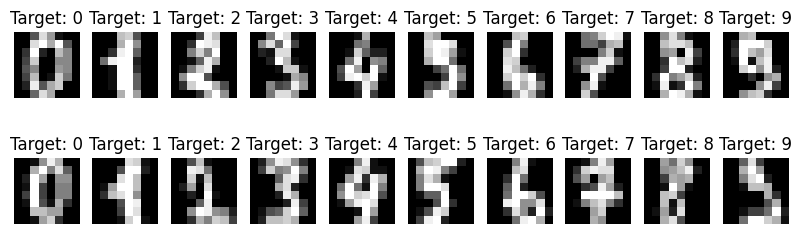

In [4]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes.reshape(-1), raw_data, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title('Target: %i' % label)

## Setup Experiment

### Preprocessing Data
Adapt the data to be manageable by the algorithms we want to use 

In [5]:
data = raw_data.reshape((len(raw_data), -1))
data.shape # first dimension as before, second and third have been reshaped

(1797, 64)

### Split data 2 ways
Create training, test, and validation data

DISCLAIMER: In this notebook, we only use 1 single train test split do demonstrate our point. In a real experiment, multiple different splits should be used to mitigate the influence of random (lucky or unlucky splits) in the experiments.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, stratify=target, random_state=44)

In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1257, 64) (1257,) (540, 64) (540,)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## Training (Machine Learning)

In [9]:
# Lets start with an arbitrary choice of parameters
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(2, 
    weights='uniform', 
    metric="euclidean", algorithm="brute")

# Train the classifier
clf.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=2)

## Evaluation
* Classify data instances, that the classifier did __not__ see during the training phase
* Check how many are classified correctly

In [10]:
y_test_pred = clf.predict(X_test_sc)
y_test_pred[0:10]

c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([2, 7, 9, 5, 1, 3, 0, 1, 3, 2])

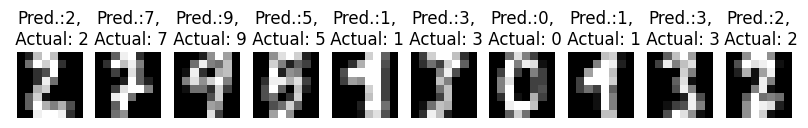

In [11]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction, actual in zip(axes, X_test, y_test_pred, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    ax.set_title(f'Pred.:{prediction},\n Actual: {actual}')

In [12]:
from sklearn import metrics
round(metrics.accuracy_score(y_test, y_test_pred),3)

0.983

# Finding a good $k$
* run loop on different values for $k$
* compute accuracy
WARNING: In real experiments, we should use a different way (similar procedure, different sets of data). More on that in classification II.

### Comparison to Random Baseline: 
* 10 classes, random guessing of the correct class
* expected: 1 out of 10 times guessed correctly -> acc=0.1

In [13]:
def get_acc(k, voting, metric):
    clf = neighbors.KNeighborsClassifier(k, weights=voting, metric=metric, algorithm="brute")
    clf.fit(X_train_sc, y_train)
    y_test_pred = clf.predict(X_test_sc)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    #print(k, voting, round(acc, 3))
    return acc


uniform_euclidean_acc=[]
distance_euclidean_acc=[]
uniform_manhattan_acc=[]
distance_manhattan_acc=[]
for k in range(1,15):
    uniform_euclidean_acc.append(get_acc(k, 'uniform', 'euclidean'))
    distance_euclidean_acc.append(get_acc(k, 'distance', 'euclidean'))
    uniform_manhattan_acc.append(get_acc(k, 'uniform', 'manhattan'))
    distance_manhattan_acc.append(get_acc(k, 'distance', 'manhattan'))


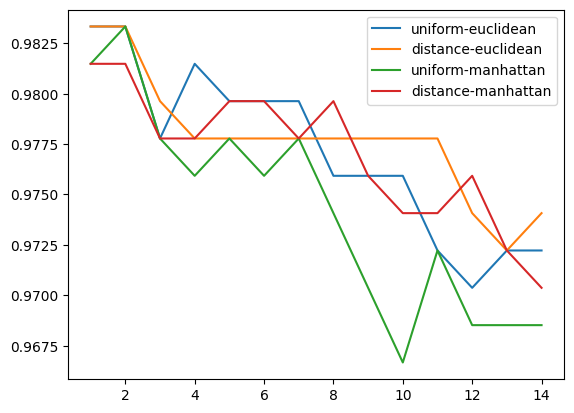

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1,15), uniform_euclidean_acc, label='uniform-euclidean')
plt.plot(range(1,15), distance_euclidean_acc, label='distance-euclidean')
plt.plot(range(1,15), uniform_manhattan_acc, label='uniform-manhattan')
plt.plot(range(1,15), distance_manhattan_acc, label='distance-manhattan')
plt.legend()

Observations: Judging from the diagram (in a real experiment, a different, more stable evaluation setup would have to be used) we observe
* values for $k$ that are higher than 4 do not increase the accuracy any further. (otherwise, if, e.g. the acc values would still rise for higher k, we would try a different range for k to find the optimum)
* accuracies of distance based voting are higher than (or comparable to) accuracies of uniform voting
* the Euclidean distance yields higher accuracies than the Manhattan distance
* the highest accuracy is achieved for distance based voting and the euclidean distance with 1, 2, 3, or 4 neighbors

In [15]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(2, weights='distance', metric="euclidean", algorithm="brute")

# Train the classifier
clf.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=2,
                     weights='distance')

In [16]:
y_test_pred = clf.predict(X_test_sc)
metrics.accuracy_score(y_test, y_test_pred)

0.9833333333333333

In [17]:
probs=clf.predict_proba(X_test_sc)
probs

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [18]:
np.round(probs[0:50,:], 2)

array([[0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.

In [19]:
clf.predict(X_test_sc)[0:10]

array([2, 7, 9, 5, 1, 3, 0, 1, 3, 2])

<div class="alert alert-block alert-info">
<b>Take Aways:</b> 

* running the $k$-NN algorithm
* validation curves for comparing different hyperparameter settings
</div>

<div class="alert alert-block alert-success">
<b>Play with:</b> 

* Try other distance functions (see sklearn implementations)
* What happens with higher $k$?
* Measure runtimes for different $k$.
</div>


## Exercise1.
 1. Describe in your own words the learning and classification process of the kNN-algorithm.

The kNN-algorithm calculates the distance or "difference" between entries that are already known and new entries the closest k number of entries are selected and the new entry is classified based on the target values of the selected neighbours. The neighbours either have the same weight for influencing the target value of the new entry or they get weighted based on a different feature like their distance to the new entry or their frequency in the entire dataset.

 2. Note and explain at least one distance measure for numeric values and for categorical values.

 the euclidian distance is one possible distance value that calculates the distance based on pythgoras equation.

In [20]:
import pandas as pd 
from io import StringIO

# Define the data as a multiline string
data = """
Day,Outlook,Temperature,Humidity,Wind,PlayTennis
D1,Sunny,Hot,High,Weak,No
D2,Sunny,Hot,High,Strong,No
D3,Overcast,Hot,High,Weak,Yes
D4,Rain,Mild,High,Weak,Yes
D5,Rain,Cool,Normal,Weak,Yes
D6,Rain,Cool,Normal,Strong,No
D7,Overcast,Cool,Normal,Strong,Yes
D8,Sunny,Mild,High,Weak,No
D9,Sunny,Cool,Normal,Weak,Yes
D10,Rain,Mild,Normal,Weak,Yes
D11,Sunny,Mild,Normal,Strong,Yes
D12,Overcast,Mild,High,Strong,Yes
D13,Overcast,Hot,Normal,Weak,Yes
D14,Rain,Mild,High,Strong,No
"""

# Use StringIO to read the string as if it were a CSV file
df = pd.read_csv(StringIO(data))

# Display the DataFrame
print(df)


    Day   Outlook Temperature Humidity    Wind PlayTennis
0    D1     Sunny         Hot     High    Weak         No
1    D2     Sunny         Hot     High  Strong         No
2    D3  Overcast         Hot     High    Weak        Yes
3    D4      Rain        Mild     High    Weak        Yes
4    D5      Rain        Cool   Normal    Weak        Yes
5    D6      Rain        Cool   Normal  Strong         No
6    D7  Overcast        Cool   Normal  Strong        Yes
7    D8     Sunny        Mild     High    Weak         No
8    D9     Sunny        Cool   Normal    Weak        Yes
9   D10      Rain        Mild   Normal    Weak        Yes
10  D11     Sunny        Mild   Normal  Strong        Yes
11  D12  Overcast        Mild     High  Strong        Yes
12  D13  Overcast         Hot   Normal    Weak        Yes
13  D14      Rain        Mild     High  Strong         No


 a) From looking at the data, describe a classification task that suggests itself.

classifying if someone should play tennis or not. You could also classify other related features like the temperatur or the Outlook

 b)Compute for k=4 the nearest neighbors for the data instance (Sunny,Mild,Normal,
 Weak) using Overlapas distance measure and classify it accordingly.

In [21]:
new = ['Sunny', 'Mild', 'Normal', 'Weak']
length = len(df)

In [22]:
X = df.iloc[:,:5]

In [23]:
def overlap_distance(list1, list2):
    # Convert lists to sets to handle unique elements and calculate intersection and union
    set1, set2 = set(list1), set(list2)
    
    # Calculate intersection and union
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    
    # Calculate Jaccard similarity (overlap score)
    jaccard_similarity = len(intersection) / len(union) if union else 0
    
    # Convert similarity to distance
    overlap_dist = 1 - jaccard_similarity
    return overlap_dist



In [24]:
difference = []
for i in range(len(X)):
    print((overlap_distance(X.iloc[i,1:].tolist(),new)))



0.6666666666666667
0.8571428571428572
0.8571428571428572
0.6666666666666667
0.6666666666666667
0.8571428571428572
0.8571428571428572
0.4
0.4
0.4
0.4
0.8571428571428572
0.6666666666666667
0.8571428571428572


In [25]:
df.iloc[7:11,-1]

7      No
8     Yes
9     Yes
10    Yes
Name: PlayTennis, dtype: object

The new entry with regard to the 4 closest neighbours would be classified as PlayTennis = Yes

c)Compute for k=4 the neighbors of the instance (Sunny,Cool,High,Strong). Which
 problem does occur? How can it be solved?

In [26]:
newc = ['Sunny', 'Cool', 'High', 'Strong']

difference = []
for i in range(len(X)):
    print((overlap_distance(X.iloc[i,1:].tolist(),newc)))



0.6666666666666667
0.4
0.8571428571428572
0.8571428571428572
0.8571428571428572
0.6666666666666667
0.6666666666666667
0.6666666666666667
0.6666666666666667
1.0
0.6666666666666667
0.6666666666666667
1.0
0.6666666666666667


Problem: we have one close neighbour and 8 other who share the same distance. We could either pick three random ones or include all of them and therefor increase k to 9.